In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


## Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (10,10)
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 500

## Load data

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e10/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e10/test.csv')

## Preliminary data analysis

In [4]:
train

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...,...
117559,117559,132.843750,56.748838,-0.060070,-0.554084,4.054348,27.844144,6.564423,44.442664,0
117560,117560,112.578125,52.539271,0.179580,-0.306961,1.637960,15.331913,11.384718,142.535470,0
117561,117561,119.757812,49.980013,0.064402,-0.270822,3.877926,19.788559,6.959740,56.367789,0
117562,117562,105.789062,46.986595,0.441426,0.372466,2.097826,17.170612,9.442445,99.074539,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


In [6]:
test

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775
...,...,...,...,...,...,...,...,...,...
78372,195936,119.328125,46.449223,0.227636,0.161986,1.120401,13.883072,14.153556,213.485463
78373,195937,125.835938,43.986678,0.078460,0.077917,2.342809,13.008583,9.907167,136.815454
78374,195938,131.789062,43.493074,0.049140,0.402859,2.116221,14.639555,10.898768,147.929016
78375,195939,79.476562,42.579993,0.817383,1.818474,1.903010,15.844982,10.723755,143.273847


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78377 non-null  int64  
 1   Mean_Integrated       78377 non-null  float64
 2   SD                    78377 non-null  float64
 3   EK                    78377 non-null  float64
 4   Skewness              78377 non-null  float64
 5   Mean_DMSNR_Curve      78377 non-null  float64
 6   SD_DMSNR_Curve        78377 non-null  float64
 7   EK_DMSNR_Curve        78377 non-null  float64
 8   Skewness_DMSNR_Curve  78377 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 5.4 MB


## Exploratory data analysis (EDA)

In [8]:
train.iloc[:,1:-1].describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076
std,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110
min,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976
25%,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136
50%,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375
75%,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290
max,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837


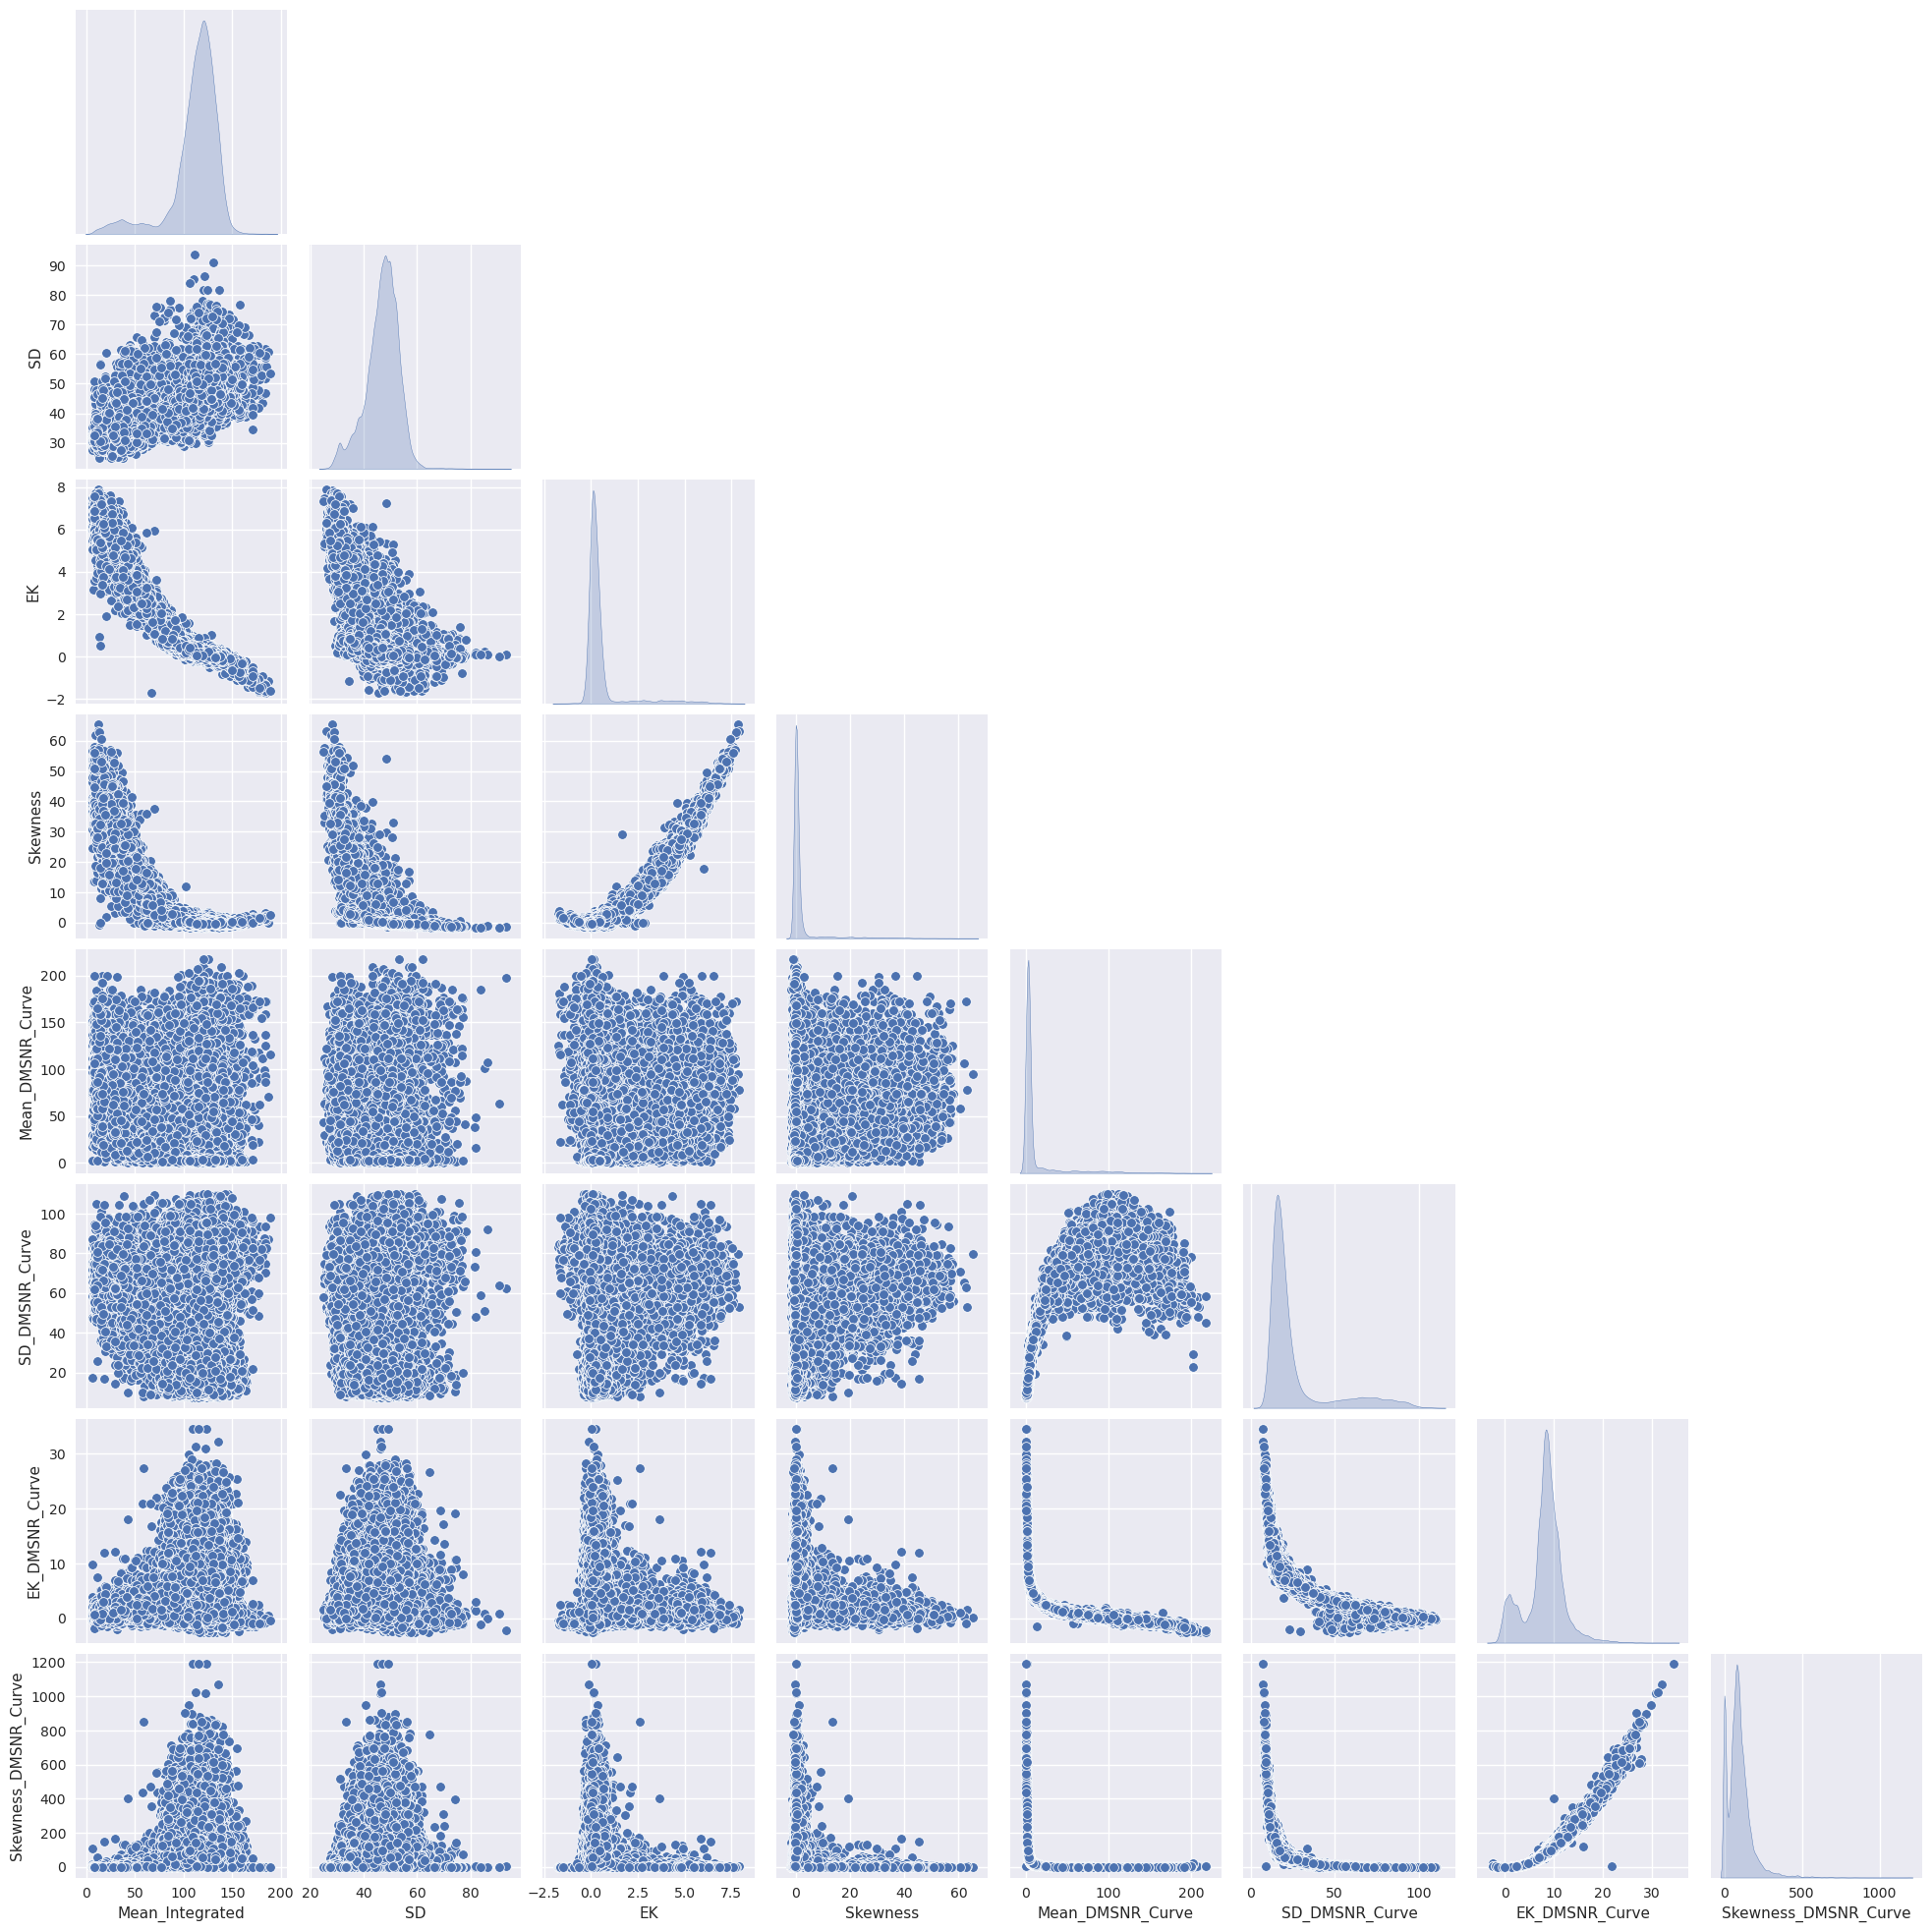

In [9]:
sns.pairplot(train.iloc[:,1:-1], diag_kind="kde", corner=True);

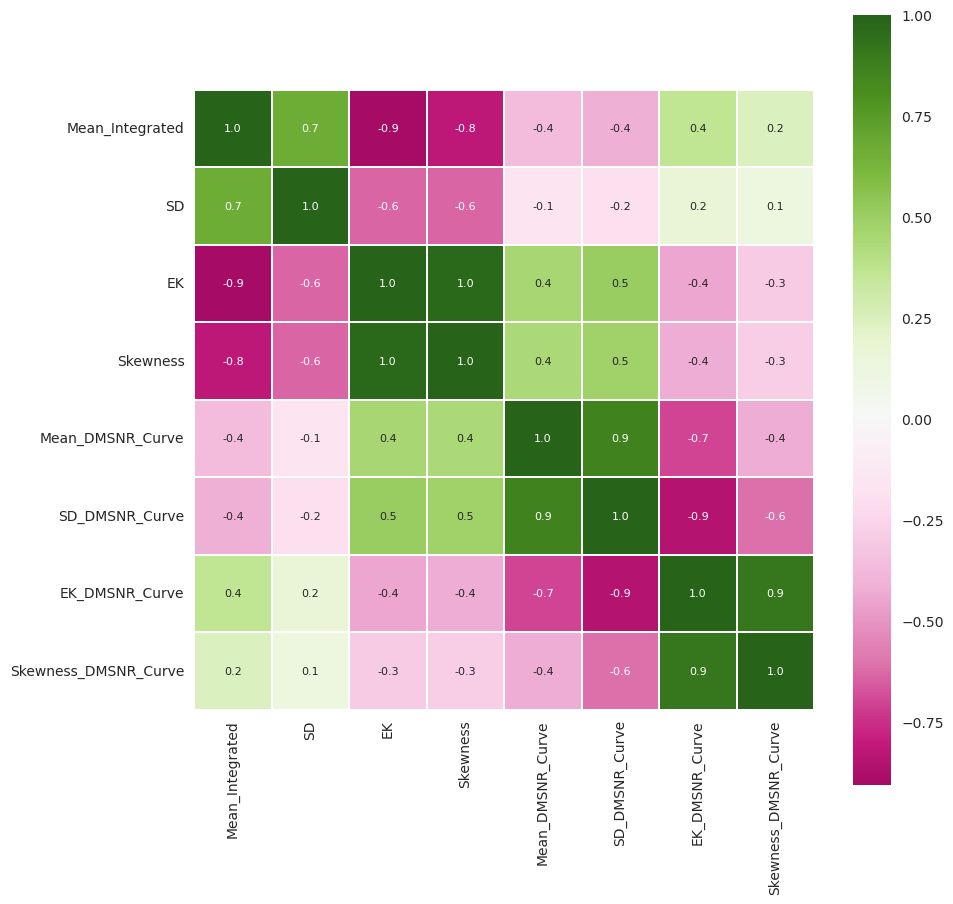

In [10]:
sns.heatmap(train.iloc[:,1:-1].corr(), cmap="PiYG", center=0,
    annot_kws={"size": 8}, fmt='.1f', linewidths=0.1, square=True, annot=True);

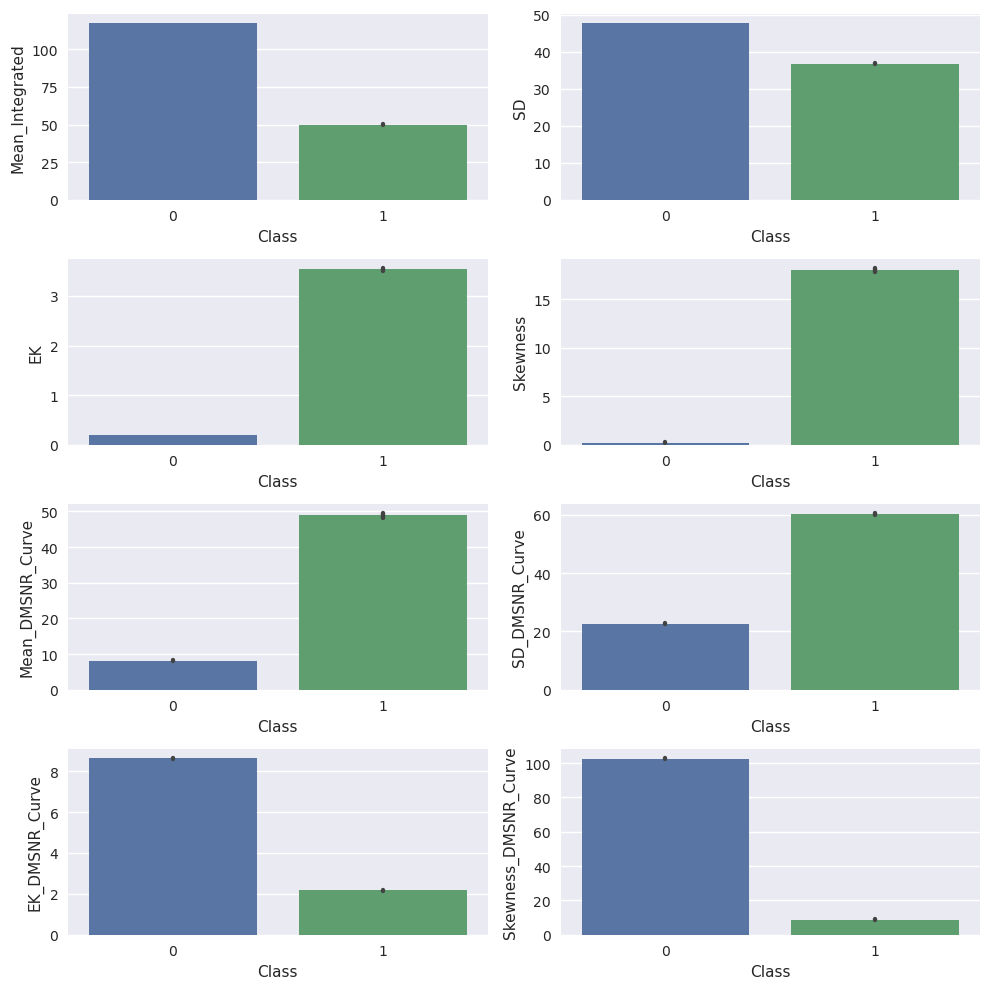

In [11]:
for i in range(8):
    plt.subplot(4,2,i+1)
    tr_d = train.iloc[:,1:-1]
    col = tr_d.iloc[:,i]
    sns.barplot(data=train, x='Class', y=col)
plt.tight_layout()    
plt.show()

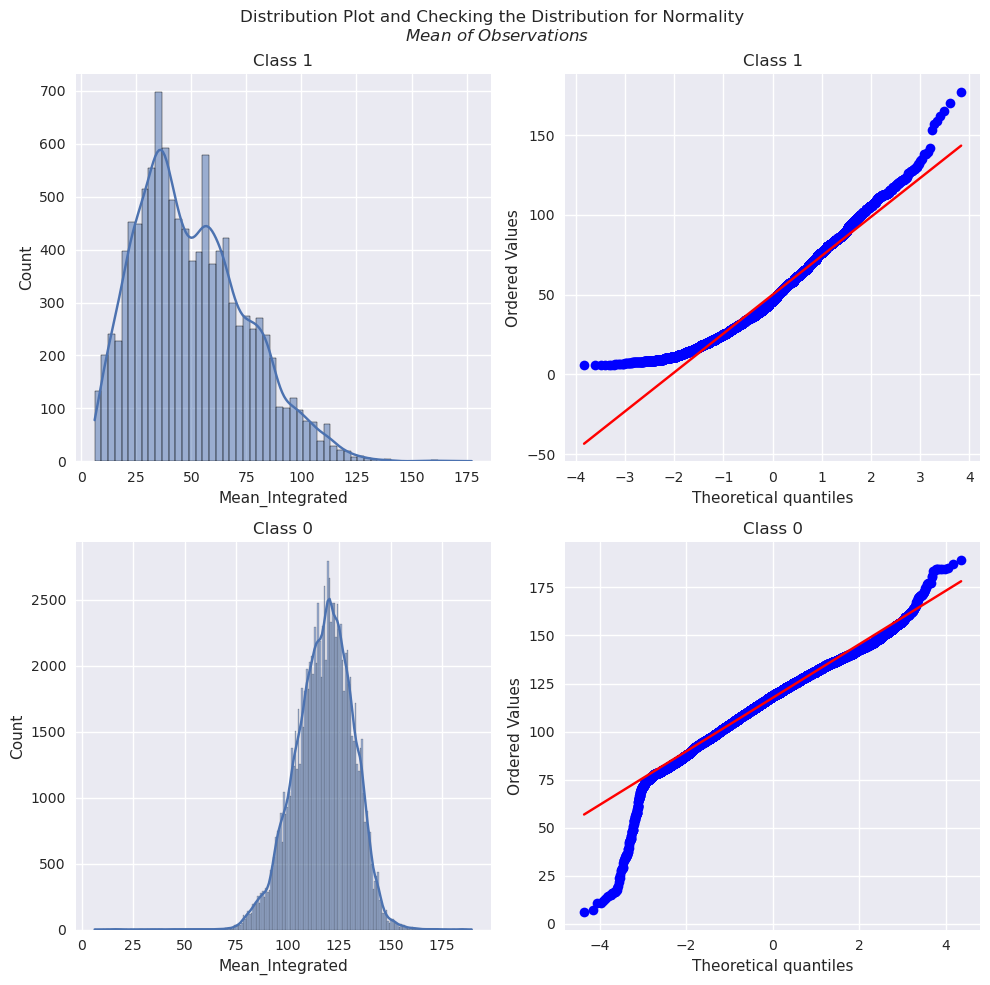

In [12]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'Mean_Integrated'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'Mean_Integrated'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'Mean_Integrated'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'Mean_Integrated'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Mean$ $of$ $Observations$')
plt.tight_layout()
plt.show()

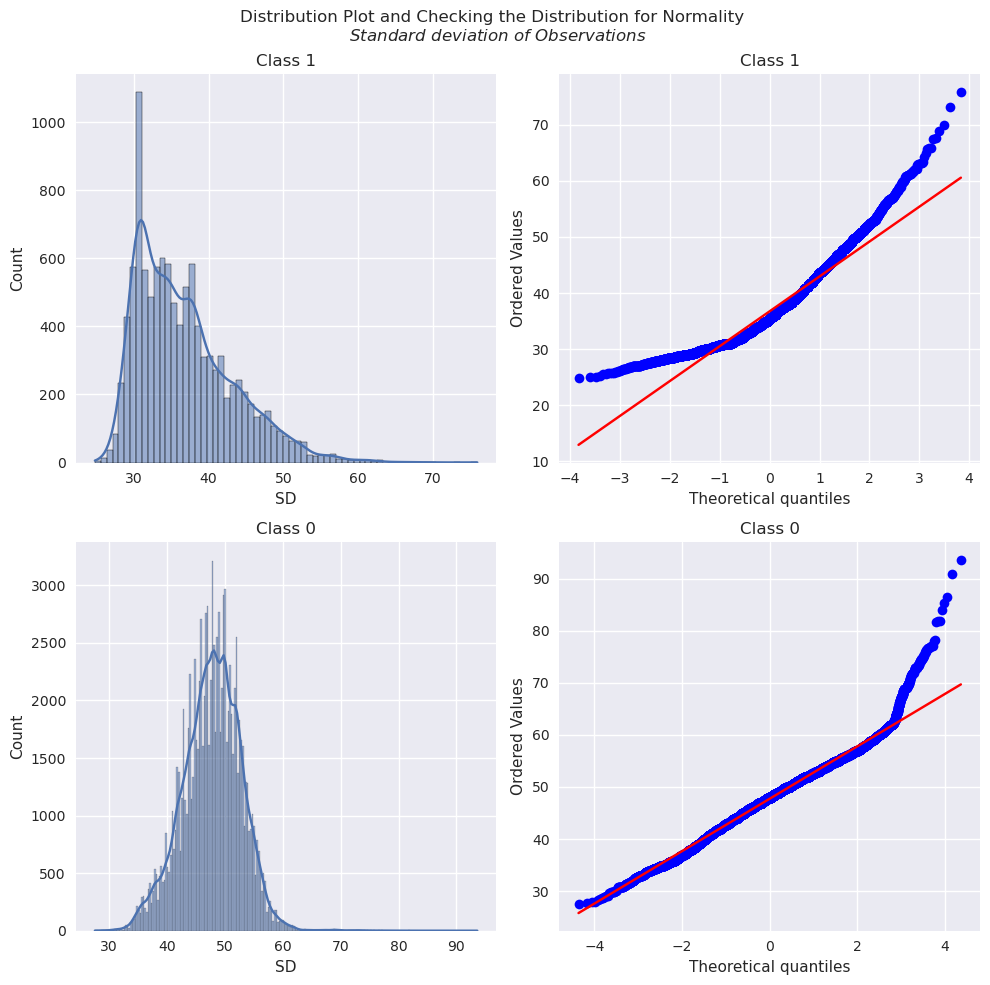

In [13]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'SD'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'SD'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'SD'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'SD'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Standard$ $deviation$ $of$ $Observations$')
plt.tight_layout()
plt.show()

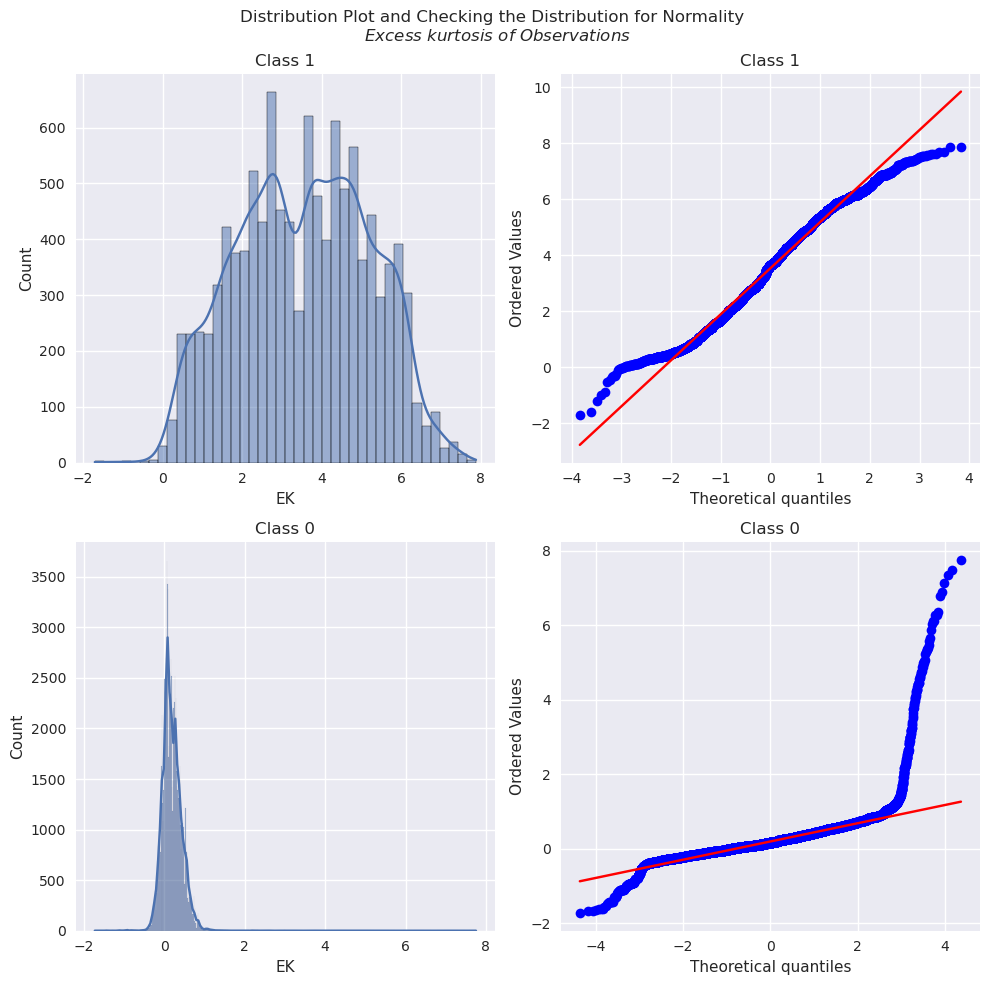

In [14]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'EK'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'EK'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'EK'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'EK'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Excess$ $kurtosis$ $of$ $Observations$')
plt.tight_layout()
plt.show()

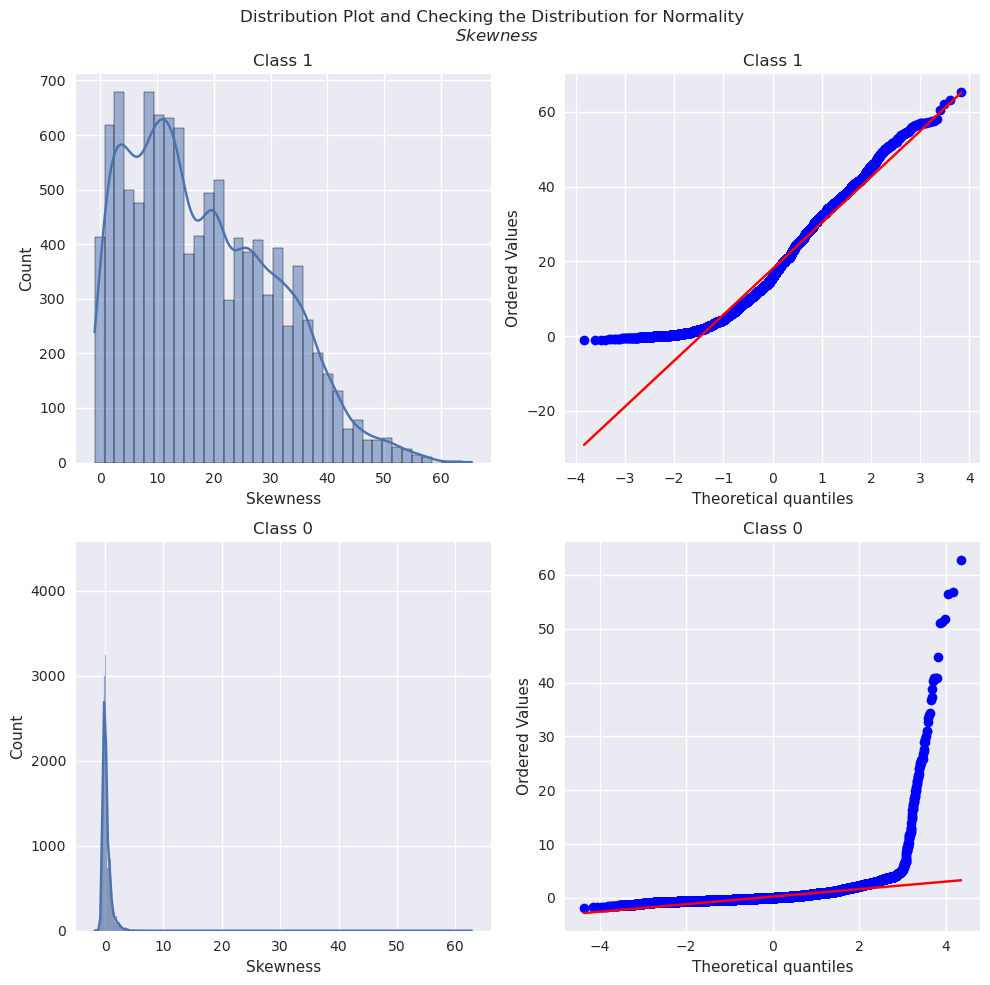

In [15]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'Skewness'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'Skewness'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'Skewness'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'Skewness'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Skewness$')
plt.tight_layout()
plt.show()

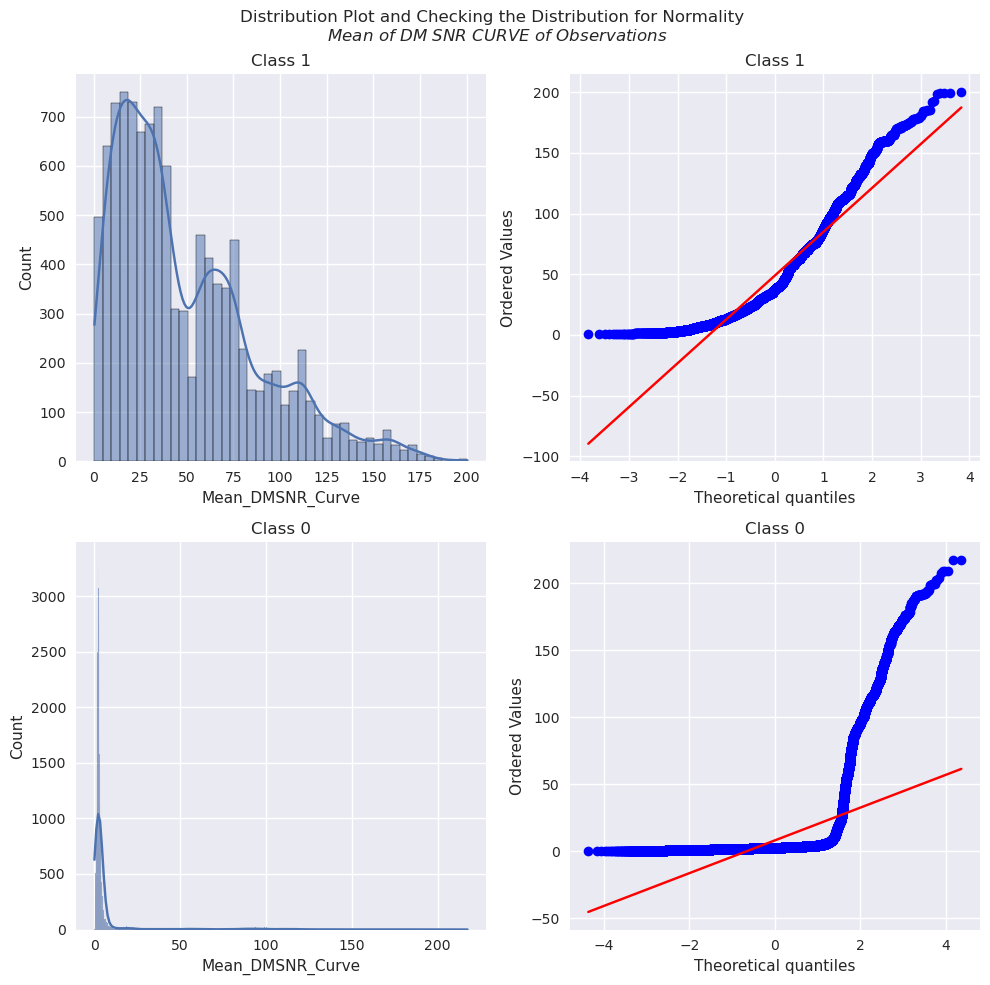

In [16]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'Mean_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'Mean_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'Mean_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'Mean_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Mean$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()

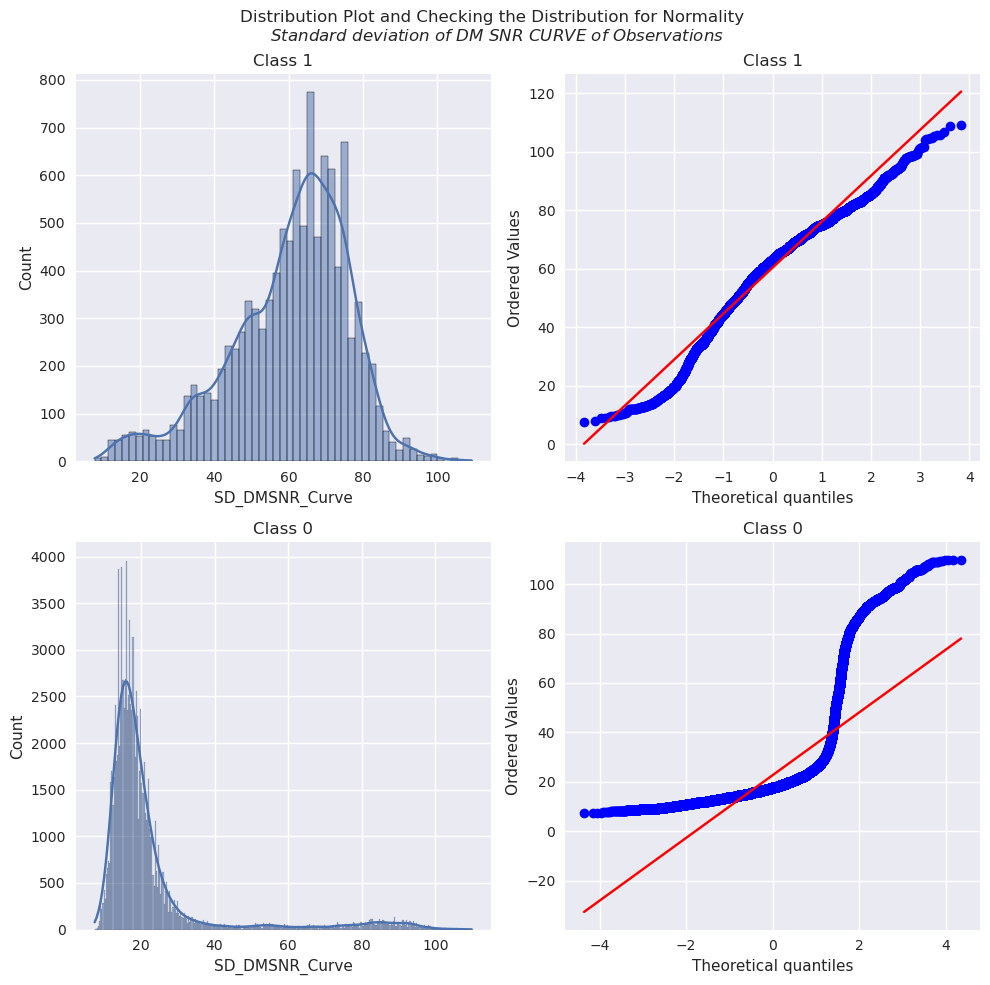

In [17]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'SD_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'SD_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'SD_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'SD_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Standard$ $deviation$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()

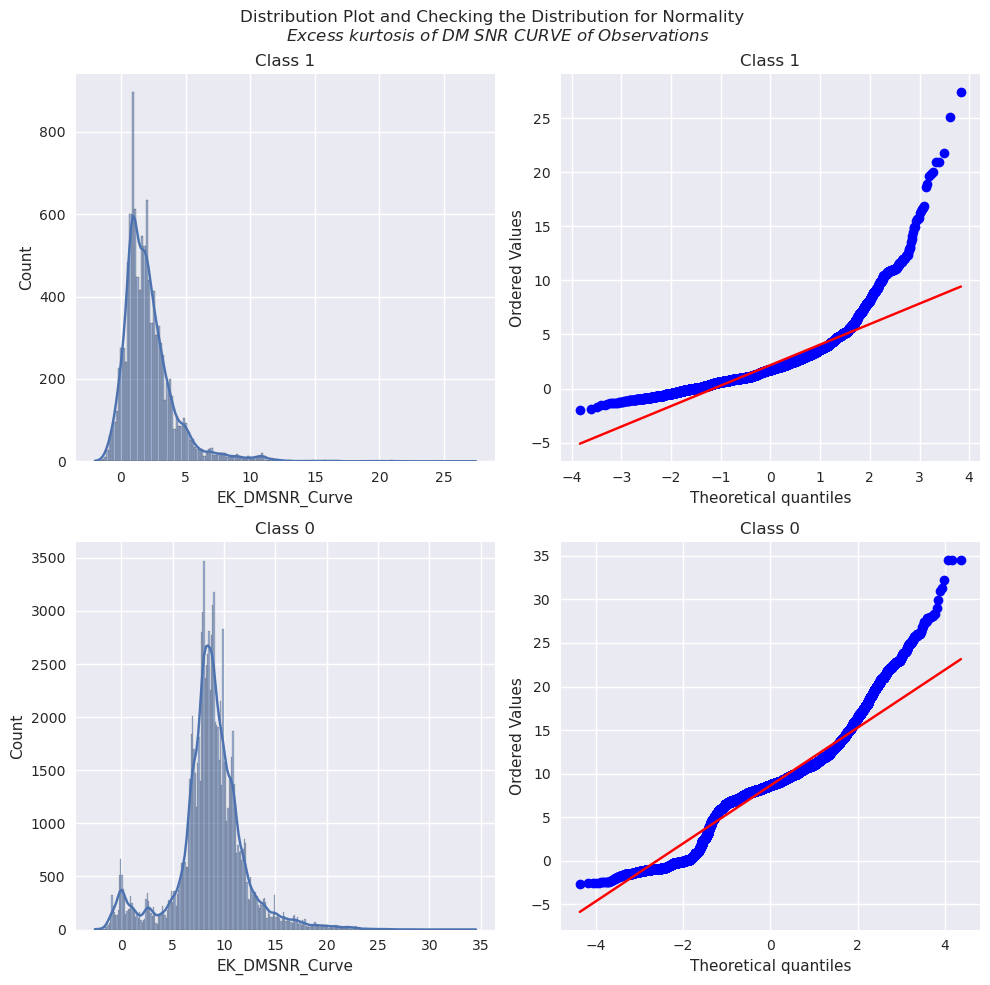

In [18]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'EK_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'EK_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'EK_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'EK_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Excess$ $kurtosis$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()

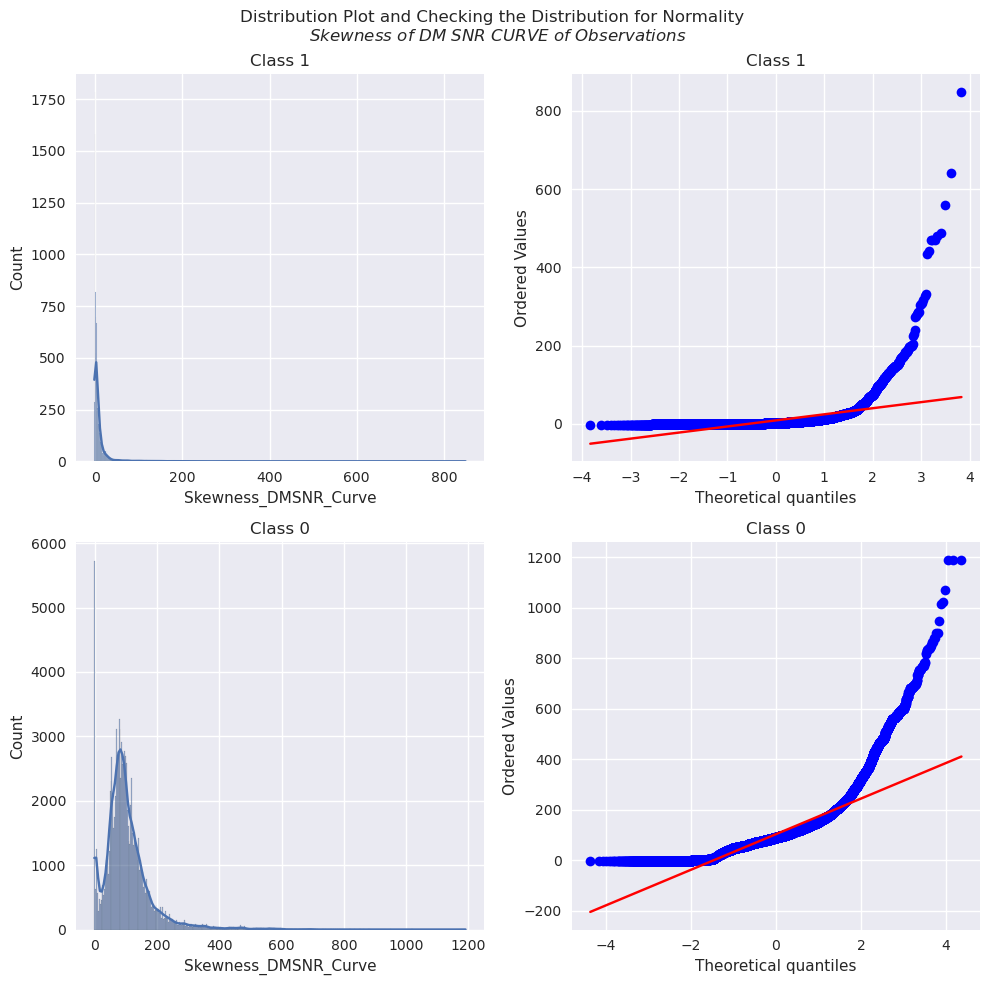

In [19]:
plt.subplot(2,2,1)
sns.histplot(data=train, x=train.loc[train['Class']==1,'Skewness_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(train.loc[train['Class']==1, 'Skewness_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=train, x=train.loc[train['Class']==0,'Skewness_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(train.loc[train['Class']==0,'Skewness_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Skewness$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()